# Deep Learning Based Approach for Diagnosis of Retinal Diseases From OCT Images
## Overview
1. Retinal Optical Coherence Tomography (OCT) is an imaging technique for capturing high resolution cross sections of living patents retinas.
2. OCT enables the Ophthalmologist to visualise the retina's different layers. This lets the doctor map and measure their thickness. These analysis aid in the diagnosing process.
3. OCT testing has become the standard way to look at and treat most eye problems. OCT uses rays of light to measure the thickness of retina. This examination does not include the use of radiation or X-rays, and an OCT scan is neither painful nor uncomfortable.
4. Every year, around 30 mmillion OCT scans are taken, and the analysis are interpretation of these pictures take a lost of time **(Swanson and Fujimoto, 2017)**.
5. OCT is beneficial for identifying a variety of eye disorders, including the following:
    - Age-related macular degeneration (AMD)
    - Diabetic retinopathy (diabetic eye disorders)
    
## Dataset Description
The dataset can be downloaded from
The dataset is divided into three folder (train, test and validation), each of which contains a subfolder for each image category **(NORMAL, CNV, DME, DRUSEN)**. There are 84,495 X-Ray images (JPEG) and four classes (NORMAL, CNV, DME, DRUSEN).
Images are labeled as (disease)-(randomized patient ID)-(image number by this patient) and split into 4 directories: CNV, DME, DRUSEN and NORMAL.

## Probelm Statement
The objective is given retinal OCT Images (optical coherence tommography) classify a new retinal image belonging to one of the four categories (CNV, DME, DRUNSEN, NORMAL).

## Evaluation Matrix
### Confusion Matrix
Our model's performance can be diagonsed mmore accurately with the help of confusion matrix. A confusion matrix is like a summary of how well a machine learning model predicts different categories in a classification problem. It shows how many times the model got it right and how many times it got it wrong for each category. The number of correct and incorrect predictions is summarized with count values and broken down by each class. The confusion matrix depicts the various ways in which our classification model is perplexed when making prediction.
This technique sheds light not only on the errors made by our classifier, but also on the types of error caused by the models. The confusion matrix can be used to calculate the values of try positive (TP), tru negative (TN), false positive (FP) and false-negative (FN).
- TP stands for correctly predicted positive class.
- FP stands for incorrectly predicted positive class.
- FN stands for incorrectly predicted negative class
- TN stands for correctly predicted negative class.

# Import relevant libraries and load dataset

In [10]:
import warnings
warnings.filterwarnings("ignore")
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm
from glob import glob
from random import sample, choice

In [16]:
old_folder_name = 'OCT2017 '
new_folder_name = 'OCT2017'
os.rename(old_folder_name, new_folder_name)

In [18]:
# print number of unique classes in the datset
print("Classes in Training Dataset  :",os.listdir("OCT2017/train"))
print("Classes in Validation Dataset:",os.listdir("OCT2017/val"))
print("Classes in Test Dataset      :",os.listdir("OCT2017/test"))

Classes in Training Dataset  : ['NORMAL', 'CNV', 'DRUSEN', 'DME']
Classes in Validation Dataset: ['NORMAL', 'CNV', 'DRUSEN', 'DME']
Classes in Test Dataset      : ['NORMAL', 'CNV', 'DRUSEN', 'DME']


## Observation
1. The dataset is divided into three folders - train, val and test.
2. Each folder (train, val and test) contains a subfolder for each category namely DRUSEN, CNV, NORMAL, DME

# Explorartory Data Analysis (EDA)

### Number of each category images in train, val and test folder

In [19]:
train = "OCT2017/train"
# Number of each category images present in training dataset
print("Number of CNV images in Training Dataset    :",len(os.listdir(f"{train}/CNV/")))
print("Number of DME images in Training Dataset    :",len(os.listdir(f"{train}/DME/")))
print("Number of DRUNSEN images in Training Dataset:",len(os.listdir(f"{train}/DRUSEN/")))
print("Number of NORMAL images in Training Dataset :",len(os.listdir(f"{train}/NORMAL/")))

Number of CNV images in Training Dataset    : 37205
Number of DME images in Training Dataset    : 11348
Number of DRUNSEN images in Training Dataset: 8616
Number of NORMAL images in Training Dataset : 26315


In [20]:
val = "OCT2017/val"

# Number of each category images present in Validation dataset
print("Number of CNV images in Validation Dataset    :",len(os.listdir(f"{val}/CNV/")))
print("Number of DME images in Validation Dataset    :",len(os.listdir(f"{val}/DME/")))
print("Number of DRUNSEN images in Validation Dataset:",len(os.listdir(f"{val}/DRUSEN/")))
print("Number of NORMAL images in Validation Dataset :",len(os.listdir(f"{val}/NORMAL/")))

Number of CNV images in Validation Dataset    : 8
Number of DME images in Validation Dataset    : 8
Number of DRUNSEN images in Validation Dataset: 8
Number of NORMAL images in Validation Dataset : 8


In [21]:
test = "OCT2017/test"

# Number of each category images present in test dataset
print("Number of CNV images in Test Dataset    :",len(os.listdir(f"{test}/CNV/")))
print("Number of DME images in Test Dataset    :",len(os.listdir(f"{test}/DME/")))
print("Number of DRUNSEN images in Test Dataset:",len(os.listdir(f"{test}/DRUSEN/")))
print("Number of NORMAL images in Test Dataset :",len(os.listdir(f"{test}/NORMAL/")))

Number of CNV images in Test Dataset    : 242
Number of DME images in Test Dataset    : 242
Number of DRUNSEN images in Test Dataset: 242
Number of NORMAL images in Test Dataset : 242


## Observation
After analyzing the data we can clearly observe that
1. The dataset consists of 84, 495 X-Ray images (JPEG) and four classes (NORMAL, CNV, DME, DRUSEN).
2. Training Dataset is highly imbalanced with classes DME and DRUSEN having very less number of images.
3. In training dataset CNV classes consists of 37205 number of images, DME class consists of 11348 number of images, DRUSEN class consists of 8616 number of images, and NORMAL class consists 26315 number of images.
4. Validation Dataset is balanced with each class having 8 images.
5. Test Dataset is balanced with each class having 242 images.

## Shape of Images in the train dataset

In [22]:
import os
import cv2
import concurrent.futures

def get_image_shape(image_path):
    image = cv2.imread(image_path)
    return image.shape if image is not None else None

def get_image_shapes(image_folder):
    image_files = os.listdir(image_folder)
    image_paths = [os.path.join(image_folder, file) for file in image_files]
    with concurrent.futures.ThreadPoolExecutor() as executor:
        image_shapes = list(executor.map(get_image_shape, image_paths))
    return [shape for shape in image_shapes if shape is not None]

train = "OCT2017/train"

# Get image shapes for CNV class
cnv_shape = get_image_shapes(os.path.join(train, "CNV"))

# Get image shapes for DME class
dme_shape = get_image_shapes(os.path.join(train, "DME"))

# Get image shapes for DRUSEN class
drusen_shape = get_image_shapes(os.path.join(train, "DRUSEN"))

# Get image shapes for NORMAL class
normal_shape = get_image_shapes(os.path.join(train, "NORMAL"))

# Print the results
print("Training Dataset:")
print(f"Shape of images belonging to CNV class: {set(cnv_shape)}")
print(f"Shape of images belonging to DME class: {set(dme_shape)}")
print(f"Shape of images belonging to DRUSEN class: {set(drusen_shape)}")
print(f"Shape of images belonging to NORMAL class: {set(normal_shape)}")


Training Dataset:
Shape of images belonging to CNV class: {(496, 512, 3), (496, 1024, 3), (496, 384, 3), (496, 1536, 3), (496, 768, 3)}
Shape of images belonging to DME class: {(496, 512, 3), (496, 1024, 3), (512, 512, 3), (496, 1536, 3), (496, 768, 3)}
Shape of images belonging to DRUSEN class: {(496, 512, 3), (496, 768, 3), (496, 1536, 3), (496, 1024, 3)}
Shape of images belonging to NORMAL class: {(496, 512, 3), (496, 1024, 3), (512, 512, 3), (496, 384, 3), (496, 1536, 3), (496, 768, 3)}


### Dataframe of heights and widths for each class

In [24]:
cnv_heights = []
cnv_widths = []

for value in (cnv_shape):
    cnv_heights.append(value[0])
    cnv_widths.append(value[1])

cnv_df = pd.DataFrame({"cnv_heights": cnv_heights, "cnv_widths": cnv_widths})

dme_heights = []
dme_widths = []

for value in (dme_shape):
    dme_heights.append(value[0])
    dme_widths.append(value[1])

dme_df = pd.DataFrame({"dme_heights":dme_heights, "dme_widths":dme_widths})

drusen_heights = []
drusen_widths = []

for value in (drusen_shape):
    drusen_heights.append(value[0])
    drusen_widths.append(value[1])

drusen_df = pd.DataFrame({"drusen_heights":drusen_heights, "drusen_widths":drusen_widths})

normal_heights = []
normal_widths = []

for value in (normal_shape):
    normal_heights.append(value[0])
    normal_widths.append(value[1])

normal_df = pd.DataFrame({"normal_heights":normal_heights, "normal_widths":normal_widths})

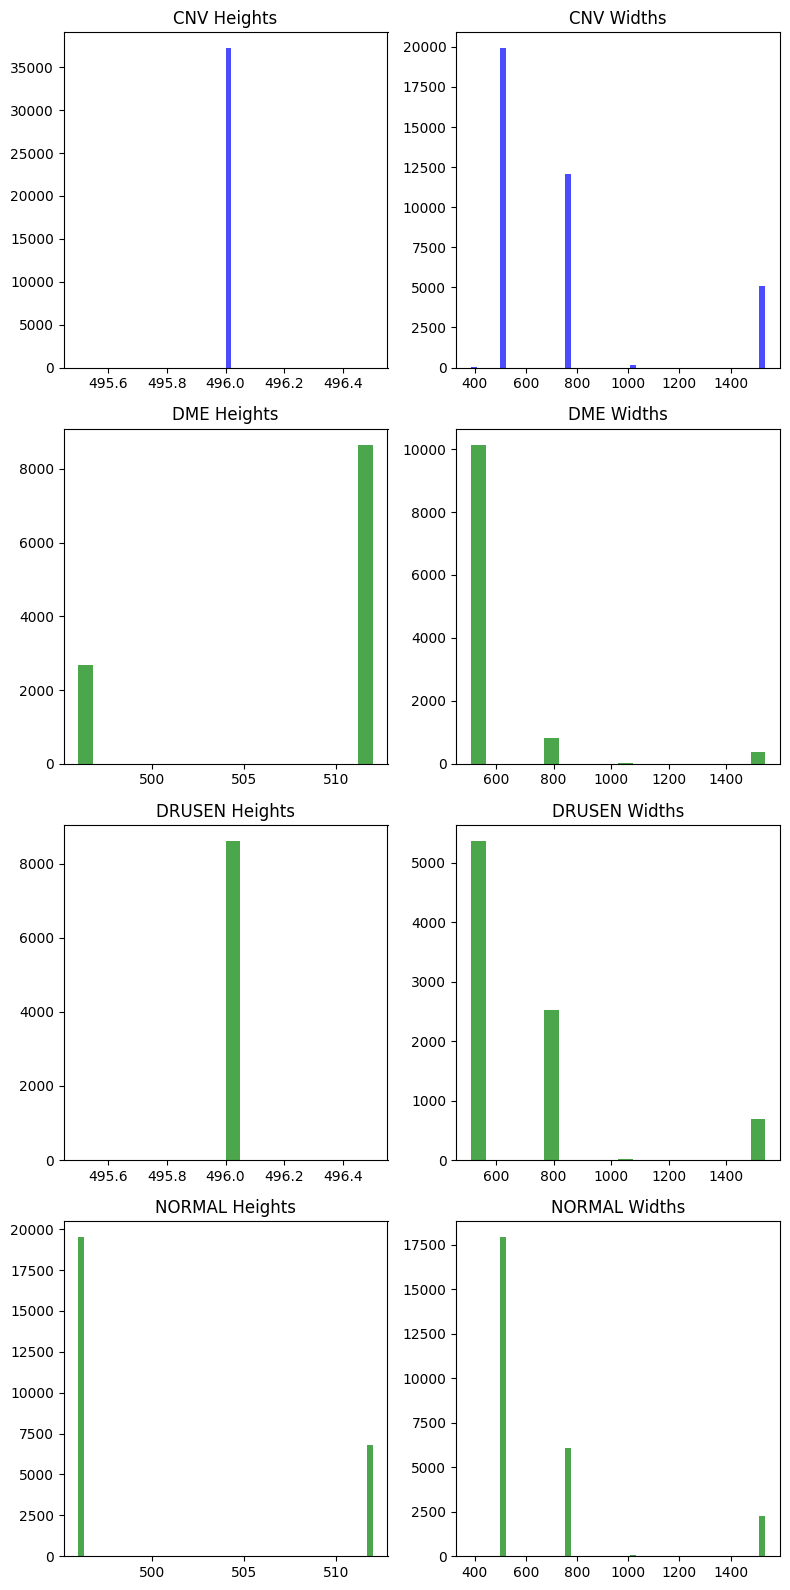

In [52]:
# Plotting histograms
plt.figure(figsize=(8, 16))

# Plotting cnv_df histogram
plt.subplot(4, 2, 1)
plt.hist(cnv_df["cnv_heights"], bins=50, color='blue', alpha=0.7)
plt.title("CNV Heights")

plt.subplot(4, 2, 2)
plt.hist(cnv_df["cnv_widths"], bins=50, color='blue', alpha=0.7)
plt.title("CNV Widths")

plt.subplot(4, 2, 3)
plt.hist(dme_df["dme_heights"], bins=20, color='green', alpha=0.7)
plt.title("DME Heights")

plt.subplot(4, 2, 4)
plt.hist(dme_df["dme_widths"], bins=20, color='green', alpha=0.7)
plt.title("DME Widths")

# Plotting drusen_df histogram
plt.subplot(4, 2, 5)
plt.hist(drusen_df["drusen_heights"], bins=20, color='green', alpha=0.7)
plt.title("DRUSEN Heights")

plt.subplot(4, 2, 6)
plt.hist(drusen_df["drusen_widths"], bins=20, color='green', alpha=0.7)
plt.title("DRUSEN Widths")

# Plotting normal_df histogram
plt.subplot(4, 2, 7)
plt.hist(normal_df["normal_heights"], bins=50, color='green', alpha=0.7)
plt.title("NORMAL Heights")

plt.subplot(4, 2, 8)
plt.hist(normal_df["normal_widths"], bins=50, color='green', alpha=0.7)
plt.title("NORMAL Widths")

plt.tight_layout()

plt.show()


## Observations
1. We can observe that images belonging to each class have different shapes.
2. By looking at the shapes of the images, we can oberve that they have three channels

## Random images fromm each category

Class CNV


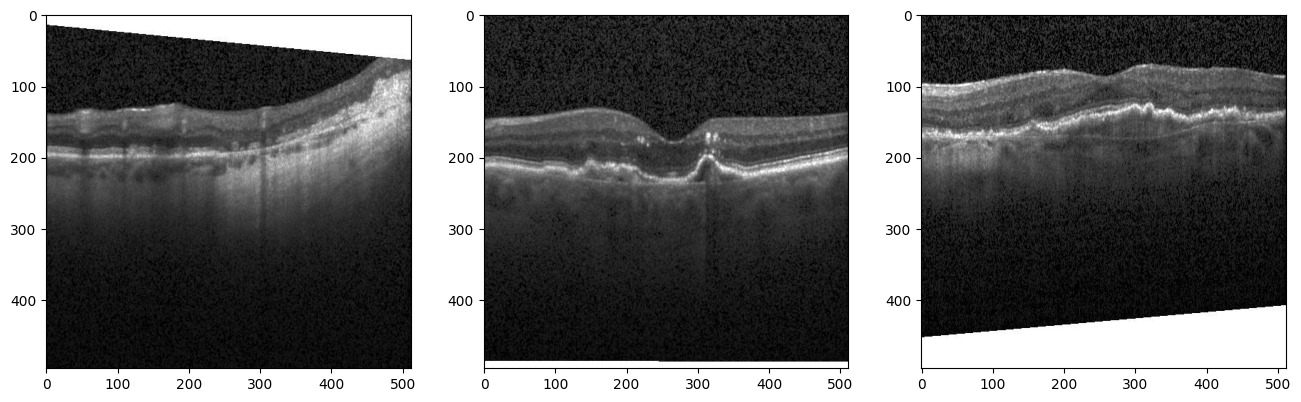

In [27]:
sample_img = sample(glob(f"{train}/CNV/**"), 3)
plt.figure(figsize=(16,16))
print("Class CNV")
plt.subplot(131)
plt.imshow(cv2.imread(sample_img[0]))
plt.subplot(132)
plt.imshow(cv2.imread(sample_img[1]))
plt.subplot(133)
plt.imshow(cv2.imread(sample_img[2]))
plt.show()

Class DME


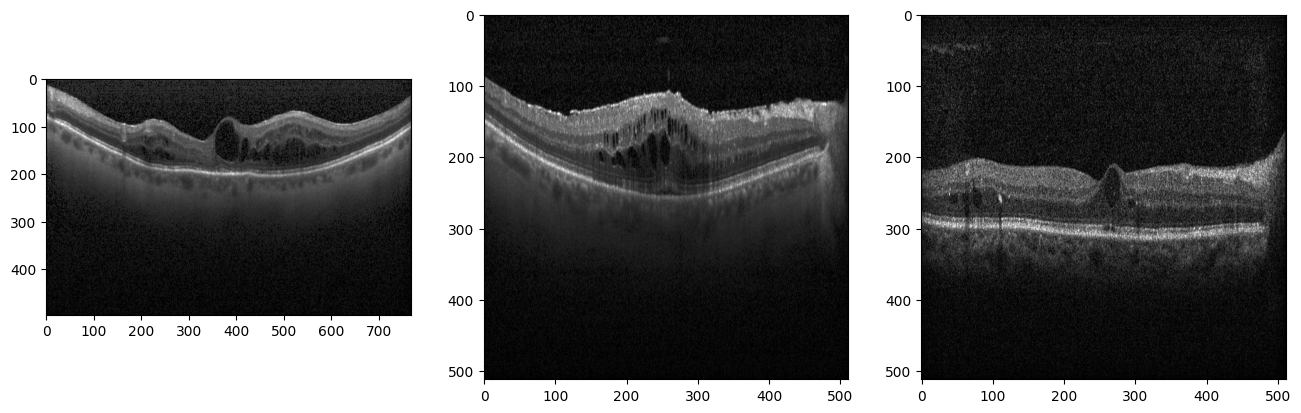

In [29]:
sample_img = sample(glob(f"{train}/DME/**"),3)
plt.figure(figsize=(16,16))
print("Class DME")
plt.subplot(131)
plt.imshow(cv2.imread(sample_img[0]))
plt.subplot(132)
plt.imshow(cv2.imread(sample_img[1]))
plt.subplot(133)
plt.imshow(cv2.imread(sample_img[2]))
plt.show()

Class DRUSEN


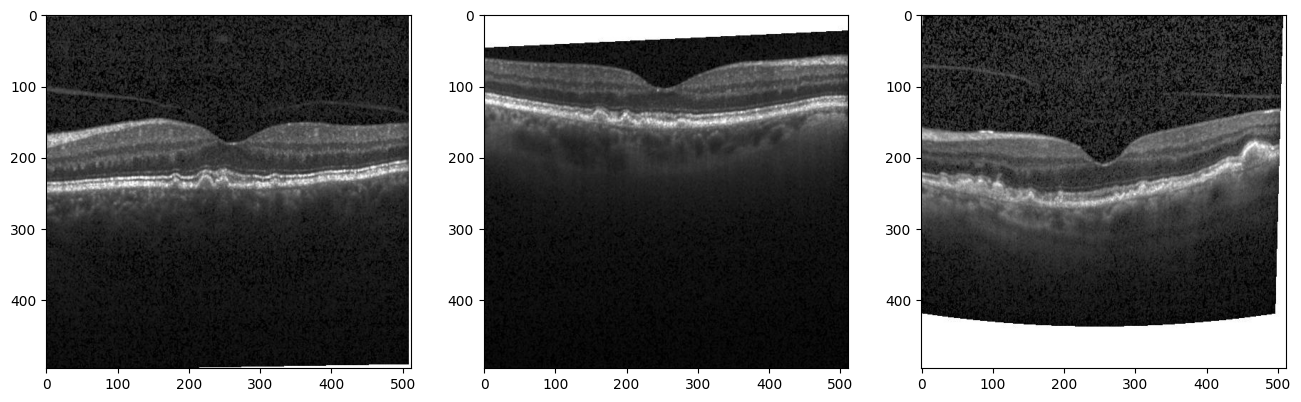

In [30]:
sample_img = sample(glob(f"{train}/DRUSEN/**"),3)
plt.figure(figsize=(16,16))
print("Class DRUSEN")
plt.subplot(131)
plt.imshow(cv2.imread(sample_img[0]))
plt.subplot(132)
plt.imshow(cv2.imread(sample_img[1]))
plt.subplot(133)
plt.imshow(cv2.imread(sample_img[2]))
plt.show()

Class NORMAL


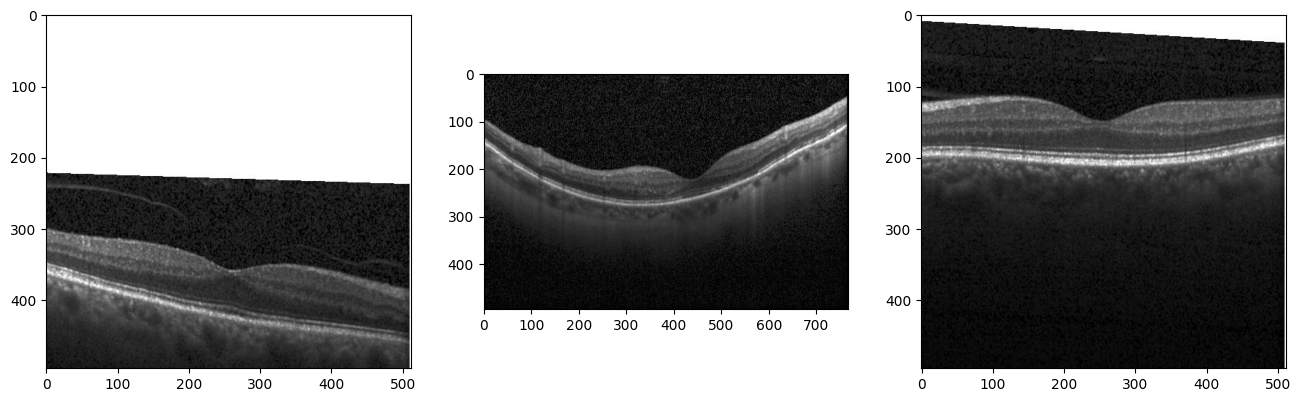

In [31]:
sample_img = sample(glob(f"{train}/NORMAL/**"),3)
plt.figure(figsize=(16,16))
print("Class NORMAL")
plt.subplot(131)
plt.imshow(cv2.imread(sample_img[0]))
plt.subplot(132)
plt.imshow(cv2.imread(sample_img[1]))
plt.subplot(133)
plt.imshow(cv2.imread(sample_img[2]))
plt.show()

## Observations:
1. We can observe that images belonging to each other class have different shape.
2. We can also observe that the categories CNV and DME can ne distinguised from DRUSEN and NORMAL by the presence of a large curve in the images.

## Slice the image into Red, Green and Blue Channels

CLASS CNV


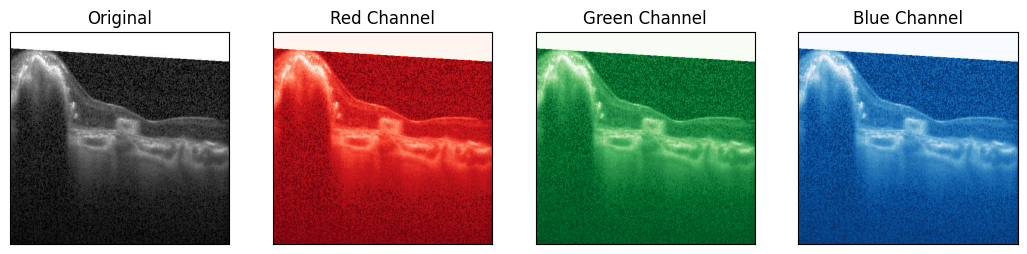

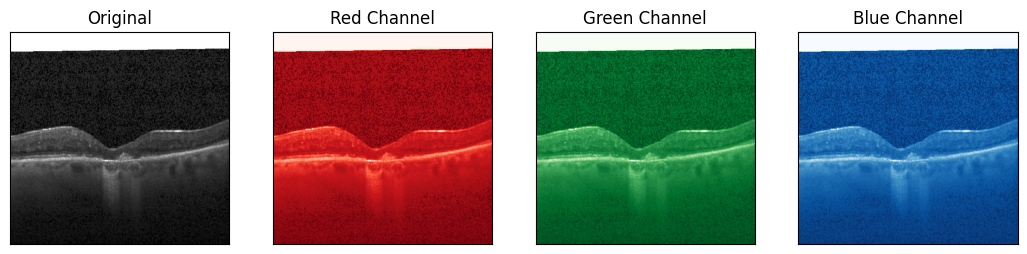

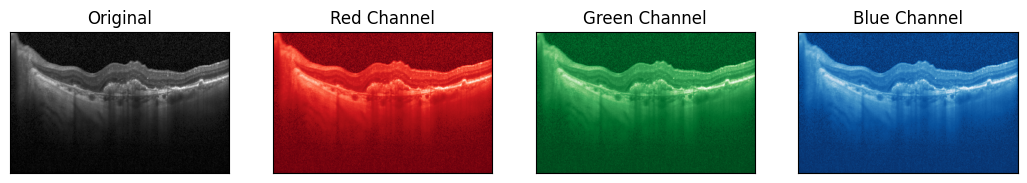

In [37]:
print("CLASS CNV")
cnv = os.listdir(f"{train}/CNV/")
titles = ["Original", "Red Channel", "Green Channel", "Blue Channel"]
cmaps = [None, plt.cm.Reds_r, plt.cm.Greens_r, plt.cm.Blues_r]

for i in range(3):
    img = cv2.imread(f"{train}/CNV/"+choice(cnv))
    fig, axes = plt.subplots(1, 4, figsize=(13,13))
    objs = zip(axes, (img, *img.transpose(2,0,1)), titles, cmaps)

    for ax, channel, title, cmap in objs:
        ax.imshow(channel, cmap=cmap)
        ax.set_title(title)
        ax.set_xticks(())
        ax.set_yticks(())

CLASS DME


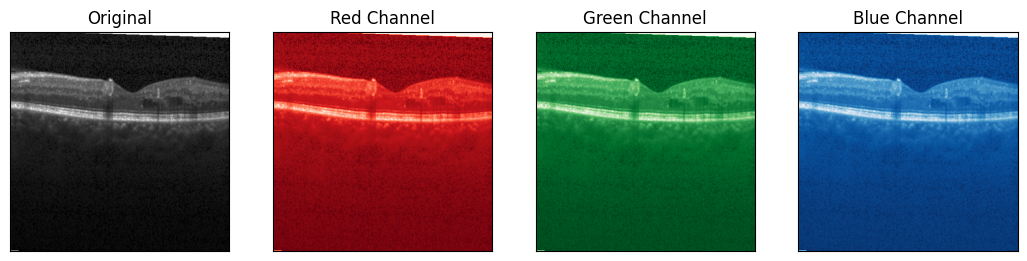

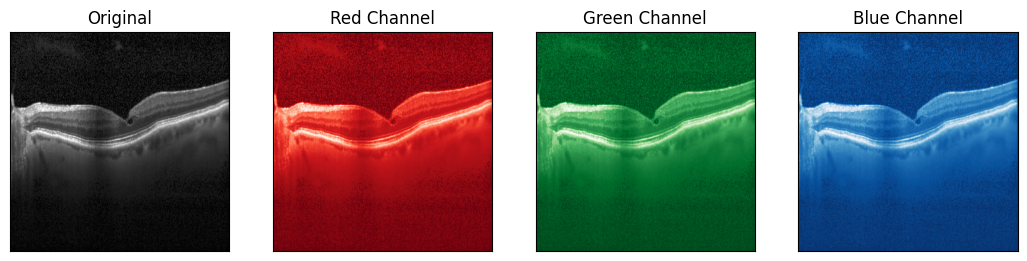

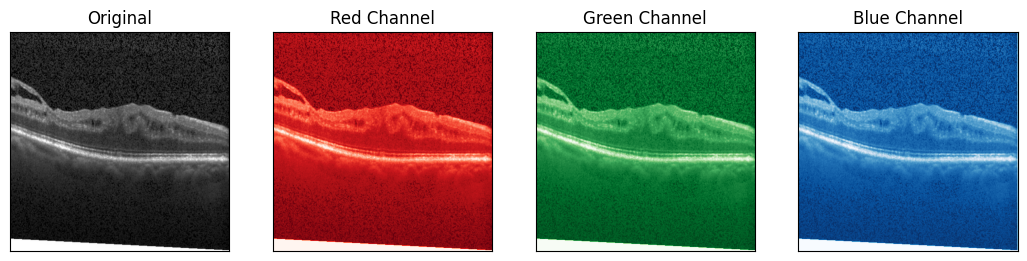

In [48]:
print("CLASS DME")
dme = os.listdir(f"{train}/DME/")
titles = ["Original", "Red Channel", "Green Channel", "Blue Channel"]
cmaps = [None, plt.cm.Reds_r, plt.cm.Greens_r, plt.cm.Blues_r]

for i in range(3):
    img = cv2.imread(f"{train}/DME/"+choice(dme))
    fig, axes = plt.subplots(1, 4, figsize=(13,13))
    objs = zip(axes, (img, *img.transpose(2,0,1)), titles, cmaps)

    for ax, channel, title, cmap in objs:
        ax.imshow(channel, cmap=cmap)
        ax.set_title(title)
        ax.set_xticks(())
        ax.set_yticks(())

CLASS DRUSEN


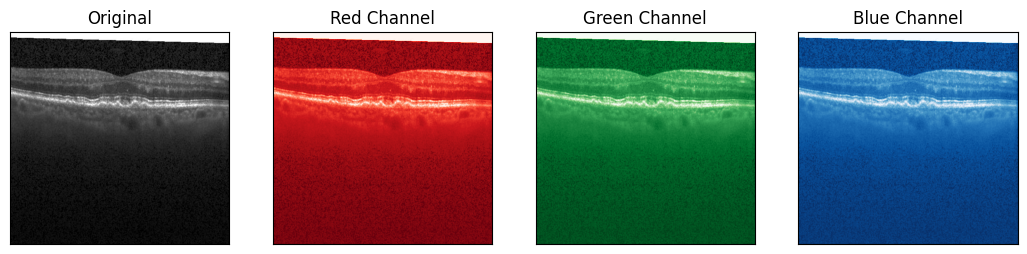

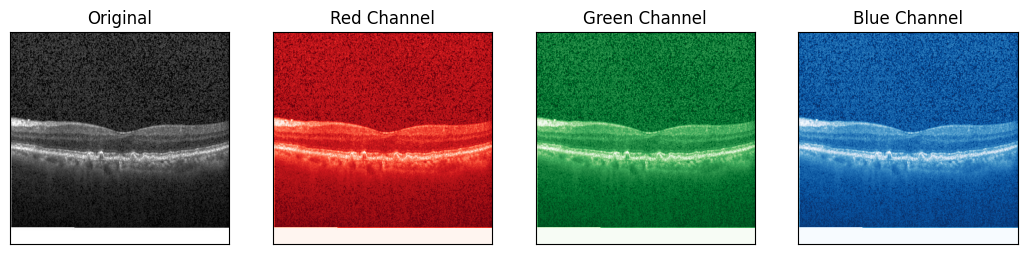

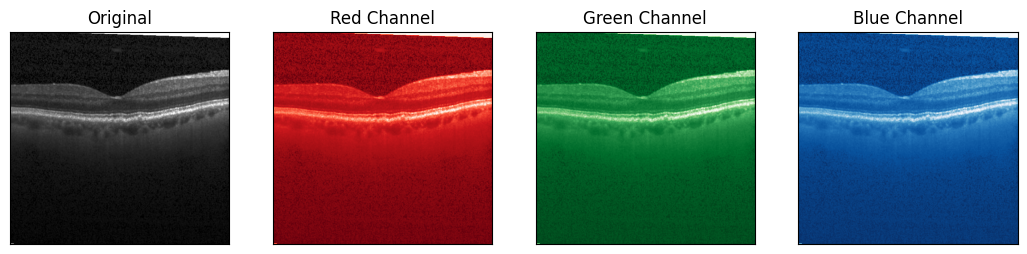

In [49]:
print("CLASS DRUSEN")
dru = os.listdir(f"{train}/DRUSEN/")
titles = ["Original", "Red Channel", "Green Channel", "Blue Channel"]
cmaps = [None, plt.cm.Reds_r, plt.cm.Greens_r, plt.cm.Blues_r]

for i in range(3):
    img = cv2.imread(f"{train}/DRUSEN/"+choice(dru))
    fig, axes = plt.subplots(1, 4, figsize=(13,13))
    objs = zip(axes, (img, *img.transpose(2,0,1)), titles, cmaps)

    for ax, channel, title, cmap in objs:
        ax.imshow(channel, cmap=cmap)
        ax.set_title(title)
        ax.set_xticks(())
        ax.set_yticks(())

CLASS NORMAL


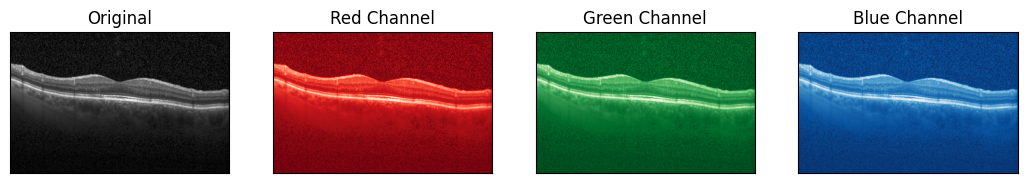

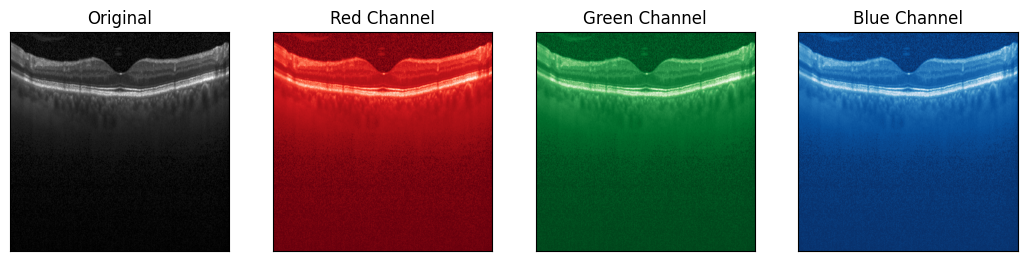

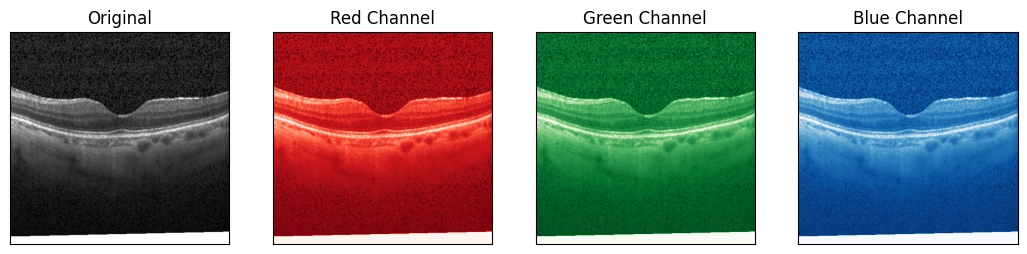

In [50]:
print("CLASS NORMAL")
normal = os.listdir(f"{train}/NORMAL/")
titles = ["Original", "Red Channel", "Green Channel", "Blue Channel"]
cmaps = [None, plt.cm.Reds_r, plt.cm.Greens_r, plt.cm.Blues_r]

for i in range(3):
    img = cv2.imread(f"{train}/NORMAL/"+choice(normal))
    fig, axes = plt.subplots(1, 4, figsize=(13,13))
    objs = zip(axes, (img, *img.transpose(2,0,1)), titles, cmaps)

    for ax, channel, title, cmap in objs:
        ax.imshow(channel, cmap=cmap)
        ax.set_title(title)
        ax.set_xticks(())
        ax.set_yticks(())

## Observations:
We are presenting some random images belonging to each class with their three separate channels that is red, green and blue channels.

# Observations:
1. The dataset is divided into three folders (train, test, and validation), each of which contains a subfolder for each image category (NORMAL, CNV, DME, DRUSEN).
2. There are 84,495 X-Ray images (JPEG) and four classes (NORMAL, CNV, DME, DRUSEN).
3. Training Dataset is slightly imbalanced with classes DME and DRUSEN having very less number of images.
4. We can observe that images belonging to each class have different shapes.
5. Also, by looking at the shapes of the images, we can observe that they have three channels i.e., red, green, and blue channels.


# Takeaways:
1. We need to bring the images to same shape.
2. Data pre-processing is one of the most critical aspects of this kaggle problem. We will perform image augmentation i.e, we will take existing photos from our training dataset and apply image tranformation operations to them, such as rotation, shearing, translation.
3. We can start by applying a simple CNN model and see how it is performing on the given dataset.